# Problema 3: Calibración de sensor de distancia

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

## 1.- Análisis de datos

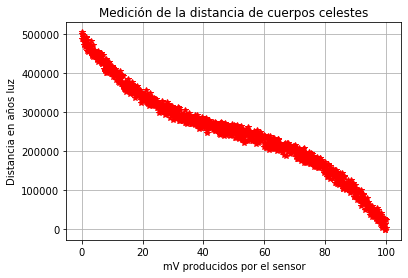

In [ ]:
# Cargar datos
data = np.load("datos/datos_p2.npy")

# Extraer informacion
x = data[:, 0]
y = data[:, 1]

# Graficar valores
plt.title("Medición de la distancia de cuerpos celestes")
plt.xlabel("mV producidos por el sensor")
plt.ylabel("Distancia en años luz")
plt.plot(x, y, "*", color="r")
plt.grid()
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5389d2e5-b4cc-4c7a-a515-5969c9747f61' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>